In [6]:
import pandas as pd 
data = pd.read_csv("/home/lingyi/Desktop/Project3/label/label_train.csv") 

In [7]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Index,identity,emotion_idx,emotion_cat,type
0,1,2,2,114,1,Neutral,simple
1,2,3,3,115,1,Neutral,simple
2,3,4,4,116,1,Neutral,simple
3,4,5,5,117,1,Neutral,simple
4,5,6,6,119,1,Neutral,simple


In [8]:
data.shape

(2250, 7)

In [9]:
data['emotion_idx']

0        1
1        1
2        1
3        1
4        1
        ..
2245    22
2246    22
2247    22
2248    22
2249    22
Name: emotion_idx, Length: 2250, dtype: int64

In [11]:
import glob
sorted(glob.glob("/home/lingyi/Desktop/Project3/test/*.jpg"))

['/home/lingyi/Desktop/Project3/test/0004.jpg',
 '/home/lingyi/Desktop/Project3/test/0005.jpg',
 '/home/lingyi/Desktop/Project3/test/0006.jpg',
 '/home/lingyi/Desktop/Project3/test/0007.jpg']

In [15]:
import os
a = sorted(os.listdir("/home/lingyi/Desktop/Project3/test"))

In [16]:
a


['0004.jpg', '0005.jpg', '0006.jpg', '0007.jpg']

'8'

In [24]:
import h5py
data = h5py.File('/home/lingyi/Desktop/Project3/data/data_train.h5', 'r', driver='core')

In [20]:
data

<HDF5 file "data_train.h5" (mode r)>

In [21]:
len(data['data_label'])

2250

In [23]:
data = h5py.File('/home/lingyi/Desktop/Project3/data/CK_data.h5', 'r', driver='core')

OSError: Unable to open file (unable to open file)

In [25]:
100+103+121+107+98+93+103+108+98+96+111+101+96+110+ 85+ 102+ 114+ 96+ 100+ 103+ 106+ 99

2250

In [26]:
203 + 121


324

In [27]:
324+107

431

In [29]:
len([12,14,9,12,9,12,6,9,11,5,7,7,6,15,6,7,8,9,11,12,8])

21

In [30]:
os.path.join('/home/lingyi/Desktop/Project3/data','data_train.h5')

'/home/lingyi/Desktop/Project3/data/data_train.h5'

In [32]:
12+14+9+12+9+12+6+9+11+5+7+7+6+15+6+7+8+9+11+12+8+7

202

In [20]:
import torch
import PIL
from PIL import Image
import torchvision
import torchvision.transforms as transforms
def predict(img_path):
    device = torch.device('cpu')
#     net = torch.load('/home/lingyi/Desktop/Project3/CK_VGG19/Test_model_Oct27.t7') 
    net = torch.load("/home/lingyi/Desktop/repo/Facial-Expression-Recognition.Pytorch/FER2013_VGG19/PrivateTest_model.t7", map_location=torch.device('cpu'))
#     net = net.to(device)
    torch.no_grad()
    img = PIL.Image.open(img_path)
    img_ = transform(img).unsqueeze(0)
    img_ = img_.to(device)
    outputs = net(img_)
    _, predicted = torch.max(outputs,1)
    print(predicted)

In [19]:
predict("/home/lingyi/Desktop/Project3/all_data/subfolder2250/2/0114.jpg")

TypeError: 'module' object is not callable

In [11]:
"""
visualize results for test image
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.autograd import Variable
import cv2 as cv
import transforms as transforms
from skimage import io
from skimage.transform import resize
from models import *

read_path = "/home/lingyi/Desktop/Project3/all_data/cropped250"
data = pd.read_csv("/home/lingyi/Desktop/Project3/all_data/label/label_test.csv") 
emotion_idx = data['emotion_idx']
file_list = sorted(os.listdir(read_path))
cut_size = 44

transform_test = transforms.Compose([
    transforms.TenCrop(cut_size),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
])


device = torch.device('cpu')
net = VGG('VGG19')
checkpoint = torch.load('/home/lingyi/Desktop/Project3/CK_VGG19/Test_model_Oct27.t7', map_location=device)
net.load_state_dict(checkpoint['net'].state_dict())
# net.cuda()

# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

labels = []
for i in range(len(emotion_idx)):
    raw_img = file_list[i]
    gray = cv.imread(os.path.join(read_path, raw_img),0).astype(np.uint8)

    # gray = rgb2gray(raw_img)
    # gray = resize(gray, (48,48), mode='symmetric').astype(np.uint8)

    img = gray[:, :, np.newaxis]

    img = np.concatenate((img, img, img), axis=2)
    img = Image.fromarray(img)
    inputs = transform_test(img)

    net.eval()

    ncrops, c, h, w = np.shape(inputs)

    inputs = inputs.view(-1, c, h, w)
    inputs = Variable(inputs, volatile=True)
    outputs = net(inputs)

    outputs_avg = outputs.view(ncrops, -1).mean(0)  # avg over crops

    score = F.softmax(outputs_avg)
    _, predicted = torch.max(outputs_avg.data, 0)

    labels.append(int(predicted.cpu().numpy())+1)


true = emotion_idx.tolist()
print(sum(np.array(labels)==np.array(true))/float(len(true)))

/home/lingyi/anaconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/lingyi/anaconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.444


In [3]:
labels

[3, 1, 1, 3, 1, 1, 1, 1, 1, 1]

In [13]:
print(sum(np.array(labels[0:100])==np.array(true[0:100]))/float(len(true[0:100])))

0.55


In [14]:
print(sum(np.array(labels[0:20])==np.array(true[0:20]))/float(len(true[0:20])))

0.7


In [17]:
"""
@author: danna.li
@date: 2019/1/19 
@file: preprocessing.py
@description: align and crop face, transfer landmarks accordingly
"""
import math
import cv2
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import face_recognition
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def detect_landmark(image_array, model_type="large"):
    """ return landmarks of a given image array
    :param image_array: numpy array of a single image
    :param model_type: 'large' returns 68 landmarks; 'small' return 5 landmarks
    :return: dict of landmarks for facial parts as keys and tuple of coordinates as values
    """
    face_landmarks_list = face_recognition.face_landmarks(image_array, model=model_type)
    face_landmarks_list = face_landmarks_list[0]
    return face_landmarks_list

def align_face(image_array, landmarks):
    """ align faces according to eyes position
    :param image_array: numpy array of a single image
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return:
    rotated_img:  numpy array of aligned image
    eye_center: tuple of coordinates for eye center
    angle: degrees of rotation
    """
    # get list landmarks of left and right eye
    left_eye = landmarks['left_eye']
    right_eye = landmarks['right_eye']
    # calculate the mean point of landmarks of left and right eye
    left_eye_center = np.mean(left_eye, axis=0).astype("int")
    right_eye_center = np.mean(right_eye, axis=0).astype("int")
    # compute the angle between the eye centroids
    dy = right_eye_center[1] - left_eye_center[1]
    dx = right_eye_center[0] - left_eye_center[0]
    # compute angle between the line of 2 centeroids and the horizontal line
    angle = math.atan2(dy, dx) * 180. / math.pi
    # calculate the center of 2 eyes
    eye_center = ((left_eye_center[0] + right_eye_center[0]) // 2,
                  (left_eye_center[1] + right_eye_center[1]) // 2)
    # at the eye_center, rotate the image by the angle
    rotate_matrix = cv2.getRotationMatrix2D(eye_center, angle, scale=1)
    rotated_img = cv2.warpAffine(image_array, rotate_matrix, (image_array.shape[1], image_array.shape[0]))
    return rotated_img, eye_center, angle

def rotate(origin, point, angle, row):
    """ rotate coordinates in image coordinate system
    :param origin: tuple of coordinates,the rotation center
    :param point: tuple of coordinates, points to rotate
    :param angle: degrees of rotation
    :param row: row size of the image
    :return: rotated coordinates of point
    """
    x1, y1 = point
    x2, y2 = origin
    y1 = row - y1
    y2 = row - y2
    angle = math.radians(angle)
    x = x2 + math.cos(angle) * (x1 - x2) - math.sin(angle) * (y1 - y2)
    y = y2 + math.sin(angle) * (x1 - x2) + math.cos(angle) * (y1 - y2)
    y = row - y
    return int(x), int(y)

def rotate_landmarks(landmarks, eye_center, angle, row):
    """ rotate landmarks to fit the aligned face
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :param eye_center: tuple of coordinates for eye center
    :param angle: degrees of rotation
    :param row: row size of the image
    :return: rotated_landmarks with the same structure with landmarks, but different values
    """
    rotated_landmarks = defaultdict(list)
    for facial_feature in landmarks.keys():
        for landmark in landmarks[facial_feature]:
            rotated_landmark = rotate(origin=eye_center, point=landmark, angle=angle, row=row)
            rotated_landmarks[facial_feature].append(rotated_landmark)
    return rotated_landmarks

def corp_face(image_array, size, landmarks):
    """ crop face according to eye,mouth and chin position
    :param image_array: numpy array of a single image
    :param size: single int value, size for w and h after crop
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return:
    cropped_img: numpy array of cropped image
    left, top: left and top coordinates of cropping
    """
    x_min = np.min(landmarks['chin'], axis=0)[0]
    x_max = np.max(landmarks['chin'], axis=0)[0]
    x_center = (x_max - x_min) / 2 + x_min
    left, right = (x_center - size / 2, x_center + size / 2)

    eye_landmark = landmarks['left_eye'] + landmarks['right_eye']
    eye_center = np.mean(eye_landmark, axis=0).astype("int")
    lip_landmark = landmarks['top_lip'] + landmarks['bottom+lip']
    lip_center = np.mean(lip_landmark, axis=0).astype("int")
    mid_part = lip_center[1] - eye_center[1]
    top, bottom = eye_center[1] - (size - mid_part) / 2, lip_center[1] + (size - mid_part) / 2

    pil_img = Image.fromarray(image_array)
    left, top, right, bottom = [int(i) for i in [left, top, right, bottom]]
    cropped_img = pil_img.crop((left, top, right, bottom))
    cropped_img = np.array(cropped_img)
    return cropped_img, left, top

def transfer_landmark(landmarks, left, top):
    """transfer landmarks to fit the cropped face
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :param left: left coordinates of cropping
    :param top: top coordinates of cropping
    :return: transferred_landmarks with the same structure with landmarks, but different values
    """
    transferred_landmarks = defaultdict(list)
    for facial_feature in landmarks.keys():
        for landmark in landmarks[facial_feature]:
            transferred_landmark = (landmark[0] - left, landmark[1] - top)
            transferred_landmarks[facial_feature].append(transferred_landmark)
    return transferred_landmarks

def face_preprocess(image, landmark_model_type='large', crop_size=140):
    """ for a given image, do face alignment and crop face
    :param image: numpy array of a single image
    :param landmark_model_type: 'large' returns 68 landmarks; 'small' return 5 landmarks
    :param crop_size: ingle int value, size for w and h after crop
    :return:
    cropped_face: image array with face aligned and cropped
    transferred_landmarks: landmarks that fit cropped_face
    """
    # detect landmarks
    face_landmarks_dict = detect_landmark(image_array=image, model_type=landmark_model_type)
    # rotate image array to align face
    aligned_face, eye_center, angle = align_face(image_array=image, landmarks=face_landmarks_dict)
    # rotate landmarks coordinates to fit the aligned face
    rotated_landmarks = rotate_landmarks(landmarks=face_landmarks_dict,
                                         eye_center=eye_center, angle=angle, row=image.shape[0])
    # crop face according to landmarks
    cropped_face, left, top = corp_face(image_array=aligned_face, size=crop_size, landmarks=rotated_landmarks)
    # transfer landmarks to fit the cropped face
    transferred_landmarks = transfer_landmark(landmarks=rotated_landmarks, left=left, top=top)
    return cropped_face, transferred_landmarks

def visualize_landmark(image_array, landmarks):
    """ plot landmarks on image
    :param image_array: numpy array of a single image
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return: plots of images with landmarks on
    """
    origin_img = Image.fromarray(image_array)
    draw = ImageDraw.Draw(origin_img)
    for facial_feature in landmarks.keys():
        draw.point(landmarks[facial_feature])
    imshow(origin_img)
if __name__=='__main__':
    # load image
    img_name = '/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg'
    image_array = cv2.imread(img_name)

    # preprocess the face image
    face,landmarks = face_preprocess(image = image_array,
                                     landmark_model_type='large',
                                     crop_size=140)

    visualize_landmark(image_array=face,landmarks=landmarks)
    plt.show()

Please install `face_recognition_models` with this command before using `face_recognition`:

pip install git+https://github.com/ageitgey/face_recognition_models


NameError: name 'quit' is not defined

In [8]:
def face_alignment(faces,show=False):
    '''
    faces: num * width * height * channels ,value = 0~255, dtype = np.uint8, 
    note: width must equal to height
    '''
    import matplotlib as plt
    print(faces.shape)
    if len(faces.shape)==4 and faces.shape[3]==1:
        faces = faces.reshape(faces.shape[:-1]) # if gray, turns to num * width * height, no channel axis 如果是灰度图，去掉最后一维，否则predictor会报错
    num = faces.shape[0]
    import numpy as np
    faces_aligned = np.zeros(shape=faces.shape,dtype=np.uint8)
    import dlib
    predictor_path = "/home/lingyi/Desktop/Project3/shape_predictor_68_face_landmarks.dat" # dlib提供的训练好的68个人脸关键点的模型，网上可以下
    predictor = dlib.shape_predictor(predictor_path) # 用来预测关键点
    for i in range(num):
        img = faces[i]
        rec = dlib.rectangle(0,0,img.shape[0],img.shape[1])
        shape = predictor(np.uint8(img),rec) # 注意输入的必须是uint8类型
        order=[36,45,30,48,54] # left eye, right eye, nose, left mouth, right mouth  注意关键点的顺序，这个在网上可以找
        if show:
            plt.pyplot.figure()
            plt.pyplot.imshow(img,cmap='gray')
            for j in order:
                x = shape.part(j).x
                y = shape.part(j).y
                plt.pyplot.scatter(x,y) # 可以plot出来看看效果，这里我只plot5个点
        eye_center =( (shape.part(36).x + shape.part(45).x) * 1./2, # 计算两眼的中心坐标
                      (shape.part(36).y + shape.part(45).y) * 1./2) 
        dx = (shape.part(45).x - shape.part(36).x) # note: right - right
        dy = (shape.part(45).y - shape.part(36).y)
        import math
        angle = math.atan2(dy,dx) * 180. / math.pi # 计算角度
#        print angle
        import cv2
        RotateMatrix = cv2.getRotationMatrix2D(eye_center, angle, scale=1) # 计算仿射矩阵
        RotImg = cv2.warpAffine(img, RotateMatrix, (img.shape[0], img.shape[1])) # 进行放射变换，即旋转
        faces_aligned[i] = RotImg
    return faces_aligned # uint8

In [9]:

import cv2
import matplotlib as plt
def demo():       

#     im_raw1 = cv2.imread('/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg')
#     im_raw1 = Image.open('/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg')
    
    
    desired_size = 368
    im_pth = '/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg'

    im = cv2.imread(im_pth).astype('uint8')
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    im_raw1 = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    plt.pyplot.figure() # plt是import matplotlib as plt，这里的输入最好是unint8
    plt.pyplot.imshow(im_raw1,cmap='gray') 
    im_raw1 = cv2.resize(im_raw1,(150,150))
    im_raw2 = cv2.imread('/home/lingyi/Desktop/Project3/all_data/all_data2500/2357.jpg').astype('uint8')
    plt.pyplot.figure()
    plt.pyplot.imshow(im_raw2,cmap='gray')
    im_raw2 = cv2.resize(im_raw2,(150,150))
    imgs = np.zeros([2,150,150,3],dtype=np.uint8)
    imgs[0] = im_raw1
    imgs[1] = im_raw2
    faces_aligned = face_alignment(imgs,show=True)
    plt.pyplot.figure()
    plt.pyplot.imshow(faces_aligned[0],cmap='gray')
    plt.pyplot.figure()
    plt.pyplot.imshow(faces_aligned[1],cmap='gray') 

In [10]:
demo()

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [64]:
from PIL import Image

def make_square(im, min_size=256, fill_color=(255, 255, 255, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

In [65]:
test_image = Image.open('/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg')
new_image = make_square(test_image)
new_image.show()

In [27]:
import numpy as np
import matplotlib as plt
import dlib
import math
import cv2

def face_alignment(faces,show=False):
    '''
    faces: num * width * height * channels ,value = 0~255, dtype = np.uint8, 
    note: width must equal to height
    '''
    
    print(faces.shape)
    if len(faces.shape)==4 and faces.shape[3]==1:
        faces = faces.reshape(faces.shape[:-1]) # if gray, turns to num * width * height, no channel axis 如果是灰度图，去掉最后一维，否则predictor会报错
    num = faces.shape[0]
    
    faces_aligned = np.zeros(shape=faces.shape,dtype=np.uint8)
   
    predictor_path = "/home/lingyi/Desktop/Project3/shape_predictor_68_face_landmarks.dat" # dlib提供的训练好的68个人脸关键点的模型，网上可以下
    predictor = dlib.shape_predictor(predictor_path) # 用来预测关键点
    for i in range(num):
        img = faces[i]
        rec = dlib.rectangle(0,0,img.shape[0],img.shape[1])
        shape = predictor(np.uint8(img),rec) # 注意输入的必须是uint8类型
        order=[36,45,30,48,54] # left eye, right eye, nose, left mouth, right mouth  注意关键点的顺序，这个在网上可以找
        if show:
            plt.pyplot.figure()
            plt.pyplot.imshow(img,cmap='gray')
            for j in order:
                x = shape.part(j).x
                y = shape.part(j).y
                plt.pyplot.scatter(x,y) # 可以plot出来看看效果，这里我只plot5个点
        eye_center =( (shape.part(36).x + shape.part(45).x) * 1./2, # 计算两眼的中心坐标
                      (shape.part(36).y + shape.part(45).y) * 1./2) 
        dx = (shape.part(45).x - shape.part(36).x) # note: right - right
        dy = (shape.part(45).y - shape.part(36).y)
        
        angle = math.atan2(dy,dx) * 180. / math.pi # 计算角度
#        print angle
        
        RotateMatrix = cv2.getRotationMatrix2D(eye_center, angle, scale=1) # 计算仿射矩阵
        RotImg = cv2.warpAffine(img, RotateMatrix, (img.shape[0], img.shape[1])) # 进行放射变换，即旋转
        faces_aligned[i] = RotImg
    return faces_aligned # uint8


def demo():       

    im_raw1 = cv2.imread('/home/lingyi/Desktop/Project3/all_data/cropped2500/2261.jpg').astype('uint8')
    desired_size = 512
    im_pth = "/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg"

    im = cv2.imread(im_pth)
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    im_raw1 = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    
    
    
    plt.pyplot.figure() # plt是import matplotlib as plt，这里的输入最好是unint8
    plt.pyplot.imshow(im_raw1,cmap='gray') 
    im_raw1 = cv2.resize(im_raw1,(181,181))
    im_raw2 = cv2.imread('/home/lingyi/Desktop/Project3/all_data/cropped2500/2261.jpg').astype('uint8')
    plt.pyplot.figure()
    plt.pyplot.imshow(im_raw2,cmap='gray')
    im_raw2 = cv2.resize(im_raw2,(181,181))
    imgs = np.zeros([2,181,181,3],dtype=np.uint8)
    imgs[0] = im_raw1
    imgs[1] = im_raw2
    faces_aligned = face_alignment(imgs,show=True)
    plt.pyplot.figure()
    plt.pyplot.imshow(faces_aligned[0],cmap='gray')
    plt.pyplot.figure()
    plt.pyplot.imshow(faces_aligned[1],cmap='gray') 

(2, 181, 181, 3)


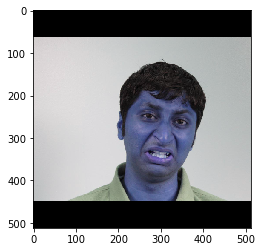

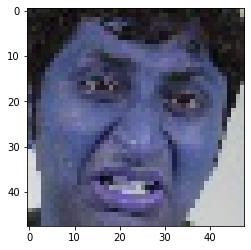

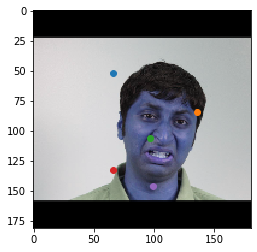

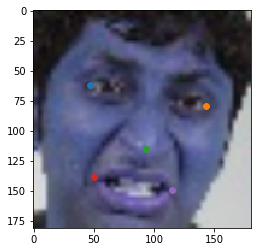

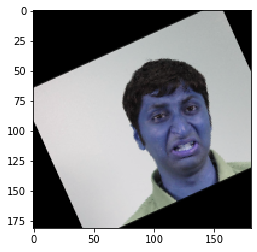

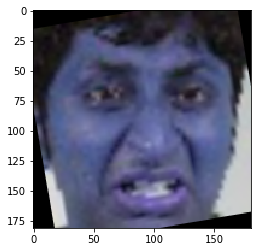

In [28]:
demo()

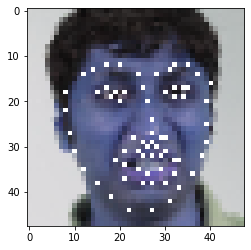

In [75]:
# -*- coding:utf-8 _*-
"""
@author: danna.li
@date: 2019/1/19 
@file: preprocessing.py
@description: align and crop face, transfer landmarks accordingly
"""
import math
import cv2
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import face_recognition
from collections import defaultdict
import numpy as np

def detect_landmark(image_array, model_type="large"):
    """ return landmarks of a given image array
    :param image_array: numpy array of a single image
    :param model_type: 'large' returns 68 landmarks; 'small' return 5 landmarks
    :return: dict of landmarks for facial parts as keys and tuple of coordinates as values
    """
    face_landmarks_list = face_recognition.face_landmarks(image_array, model=model_type)
    face_landmarks_list = face_landmarks_list[0]
    return face_landmarks_list

def align_face(image_array, landmarks):
    """ align faces according to eyes position
    :param image_array: numpy array of a single image
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return:
    rotated_img:  numpy array of aligned image
    eye_center: tuple of coordinates for eye center
    angle: degrees of rotation
    """
    # get list landmarks of left and right eye
    left_eye = landmarks['left_eye']
    right_eye = landmarks['right_eye']
    # calculate the mean point of landmarks of left and right eye
    left_eye_center = np.mean(left_eye, axis=0).astype("int")
    right_eye_center = np.mean(right_eye, axis=0).astype("int")
    # compute the angle between the eye centroids
    dy = right_eye_center[1] - left_eye_center[1]
    dx = right_eye_center[0] - left_eye_center[0]
    # compute angle between the line of 2 centeroids and the horizontal line
    angle = math.atan2(dy, dx) * 180. / math.pi
    # calculate the center of 2 eyes
    eye_center = ((left_eye_center[0] + right_eye_center[0]) // 2,
                  (left_eye_center[1] + right_eye_center[1]) // 2)
    # at the eye_center, rotate the image by the angle
    rotate_matrix = cv2.getRotationMatrix2D(eye_center, angle, scale=1)
    rotated_img = cv2.warpAffine(image_array, rotate_matrix, (image_array.shape[1], image_array.shape[0]))
    return rotated_img, eye_center, angle

def rotate(origin, point, angle, row):
    """ rotate coordinates in image coordinate system
    :param origin: tuple of coordinates,the rotation center
    :param point: tuple of coordinates, points to rotate
    :param angle: degrees of rotation
    :param row: row size of the image
    :return: rotated coordinates of point
    """
    x1, y1 = point
    x2, y2 = origin
    y1 = row - y1
    y2 = row - y2
    angle = math.radians(angle)
    x = x2 + math.cos(angle) * (x1 - x2) - math.sin(angle) * (y1 - y2)
    y = y2 + math.sin(angle) * (x1 - x2) + math.cos(angle) * (y1 - y2)
    y = row - y
    return int(x), int(y)

def rotate_landmarks(landmarks, eye_center, angle, row):
    """ rotate landmarks to fit the aligned face
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :param eye_center: tuple of coordinates for eye center
    :param angle: degrees of rotation
    :param row: row size of the image
    :return: rotated_landmarks with the same structure with landmarks, but different values
    """
    rotated_landmarks = defaultdict(list)
    for facial_feature in landmarks.keys():
        for landmark in landmarks[facial_feature]:
            rotated_landmark = rotate(origin=eye_center, point=landmark, angle=angle, row=row)
            rotated_landmarks[facial_feature].append(rotated_landmark)
    return rotated_landmarks

def corp_face(image_array, size, landmarks):
    """ crop face according to eye,mouth and chin position
    :param image_array: numpy array of a single image
    :param size: single int value, size for w and h after crop
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return:
    cropped_img: numpy array of cropped image
    left, top: left and top coordinates of cropping
    """
    x_min = np.min(landmarks['chin'], axis=0)[0]
    x_max = np.max(landmarks['chin'], axis=0)[0]
    x_center = (x_max - x_min) / 2 + x_min
    left, right = (x_center - size / 2, x_center + size / 2)

    eye_landmark = landmarks['left_eye'] + landmarks['right_eye']
    eye_center = np.mean(eye_landmark, axis=0).astype("int")
    lip_landmark = landmarks['top_lip'] + landmarks['bottom+lip']
    lip_center = np.mean(lip_landmark, axis=0).astype("int")
    mid_part = lip_center[1] - eye_center[1]
    top, bottom = eye_center[1] - (size - mid_part) / 2, lip_center[1] + (size - mid_part) / 2

    pil_img = Image.fromarray(image_array)
    left, top, right, bottom = [int(i) for i in [left, top, right, bottom]]
    cropped_img = pil_img.crop((left, top, right, bottom))
    cropped_img = np.array(cropped_img)
    return cropped_img, left, top

def transfer_landmark(landmarks, left, top):
    """transfer landmarks to fit the cropped face
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :param left: left coordinates of cropping
    :param top: top coordinates of cropping
    :return: transferred_landmarks with the same structure with landmarks, but different values
    """
    transferred_landmarks = defaultdict(list)
    for facial_feature in landmarks.keys():
        for landmark in landmarks[facial_feature]:
            transferred_landmark = (landmark[0] - left, landmark[1] - top)
            transferred_landmarks[facial_feature].append(transferred_landmark)
    return transferred_landmarks

def face_preprocess(image, landmark_model_type='large', crop_size=140):
    """ for a given image, do face alignment and crop face
    :param image: numpy array of a single image
    :param landmark_model_type: 'large' returns 68 landmarks; 'small' return 5 landmarks
    :param crop_size: ingle int value, size for w and h after crop
    :return:
    cropped_face: image array with face aligned and cropped
    transferred_landmarks: landmarks that fit cropped_face
    """
    # detect landmarks
    face_landmarks_dict = detect_landmark(image_array=image, model_type=landmark_model_type)
    # rotate image array to align face
    aligned_face, eye_center, angle = align_face(image_array=image, landmarks=face_landmarks_dict)
    # rotate landmarks coordinates to fit the aligned face
    rotated_landmarks = rotate_landmarks(landmarks=face_landmarks_dict,
                                         eye_center=eye_center, angle=angle, row=image.shape[0])
    # crop face according to landmarks
    cropped_face, left, top = corp_face(image_array=aligned_face, size=crop_size, landmarks=rotated_landmarks)
    # transfer landmarks to fit the cropped face
    transferred_landmarks = transfer_landmark(landmarks=rotated_landmarks, left=left, top=top)
    return cropped_face, transferred_landmarks

def visualize_landmark(image_array, landmarks):
    """ plot landmarks on image
    :param image_array: numpy array of a single image
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return: plots of images with landmarks on
    """
    origin_img = Image.fromarray(image_array)
    draw = ImageDraw.Draw(origin_img)
    for facial_feature in landmarks.keys():
        draw.point(landmarks[facial_feature])
    imshow(origin_img)
    
    
def image_padding(im_pth):
    im = cv2.imread(im_pth)
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    image_array = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    return(image_array)
    
if __name__=='__main__':
    # load image
    desired_size = 96
    im_pth = "/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg"

#     im = cv2.imread(im_pth)
#     old_size = im.shape[:2] # old_size is in (height, width) format

#     ratio = float(desired_size)/max(old_size)
#     new_size = tuple([int(x*ratio) for x in old_size])

#     # new_size should be in (width, height) format

#     im = cv2.resize(im, (new_size[1], new_size[0]))

#     delta_w = desired_size - new_size[1]
#     delta_h = desired_size - new_size[0]
#     top, bottom = delta_h//2, delta_h-(delta_h//2)
#     left, right = delta_w//2, delta_w-(delta_w//2)

#     color = [0, 0, 0]
#     image_array = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
#         value=color)

    image_array = image_padding(im_pth)

    # preprocess the face image
    face,landmarks = face_preprocess(image = image_array,
                                     landmark_model_type='large',
                                     crop_size=48)

    visualize_landmark(image_array=face,landmarks=landmarks)
    cv2.imwrite("/home/lingyi/Desktop/Project3/all_data/lalalla/test.jpg",face)
    plt.show()
    
# https://zhuanlan.zhihu.com/p/55479744

In [ ]:
import cv2 as cv
import numpy as np

src = cv.imread("/home/lingyi/Desktop/Project3/all_data/all_data2500/2261.jpg")
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", src)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# 转换为浮点数类型数组
gray = np.float32(gray)
print(gray)

# scale and shift by NORM_MINMAX
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=0, beta=1.0, norm_type=cv.NORM_MINMAX)
print(dst)
cv.imshow("NORM_MINMAX", np.uint8(dst*255))

# scale and shift by NORM_INF
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_INF)
print(dst)
cv.imshow("NORM_INF", np.uint8(dst*255))

# scale and shift by NORM_L1
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L1)
print(dst)
cv.imshow("NORM_L1", np.uint8(dst*10000000))

# scale and shift by NORM_L2
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L2)
print(dst)
cv.imshow("NORM_L2", np.uint8(dst*10000))

cv.waitKey(0)
cv.destroyAllWindows()

[[203. 204. 204. ... 175. 177. 179.]
 [203. 204. 204. ... 175. 175. 175.]
 [203. 204. 204. ... 175. 173. 172.]
 ...
 [190. 190. 191. ... 202. 202. 202.]
 [190. 190. 190. ... 202. 202. 202.]
 [189. 190. 190. ... 201. 201. 201.]]
[[0.88646287 0.8908297  0.8908297  ... 0.76419216 0.7729258  0.7816594 ]
 [0.88646287 0.8908297  0.8908297  ... 0.76419216 0.76419216 0.76419216]
 [0.88646287 0.8908297  0.8908297  ... 0.76419216 0.75545853 0.7510917 ]
 ...
 [0.82969433 0.82969433 0.83406115 ... 0.8820961  0.8820961  0.8820961 ]
 [0.82969433 0.82969433 0.82969433 ... 0.8820961  0.8820961  0.8820961 ]
 [0.8253275  0.82969433 0.82969433 ... 0.8777293  0.8777293  0.8777293 ]]
[[0.88646287 0.8908297  0.8908297  ... 0.76419216 0.7729258  0.7816594 ]
 [0.88646287 0.8908297  0.8908297  ... 0.76419216 0.76419216 0.76419216]
 [0.88646287 0.8908297  0.8908297  ... 0.76419216 0.75545853 0.7510917 ]
 ...
 [0.82969433 0.82969433 0.83406115 ... 0.8820961  0.8820961  0.8820961 ]
 [0.82969433 0.82969433 0.82969